# Name: Dave Jhared G. Paduada
# Section: BSCpE III - **IF**

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime
from datetime import datetime

In [122]:
# Question #1
# What is the day for the date, September 11, 1952?
# Use .strftime('A%') to identify the day (e.g. Monday, Tuesday)

date_obj = datetime(1952, 9, 11)
day = date_obj.strftime('%A')
day

'Thursday'

In [123]:
# Question #2
# Using pd.date_range, create dates starting from October15, 2008 with 85 periods with day frequency.
# What date is second to the last?

dates = pd.date_range(start='2008-10-15', periods=85, freq='D')
second_to_last_date = dates[-2]
second_to_last_date

Timestamp('2009-01-06 00:00:00')

In [124]:
# Load Dataset (exp_crypto)
cxp_crypto = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/refs/heads/master/Data%20Sets/cxp_crypto.csv', index_col = 'Date', parse_dates = True)
cxp_crypto.head()

,Close,Volume
Date,,
2015-01-02,36.926601,2725884.731
2015-01-03,37.340510,2715483.462
2015-01-04,37.799113,2232065.193
2015-01-05,36.941454,2492694.925
2015-01-06,36.962395,3125069.656


In [125]:
# Question #3

#If you resample the 'Close' column to weekly mean frequency, what is the value of 2016-05-01?


week_crypto = cxp_crypto['Close'].resample('W').mean()

crypto_2016 = week_crypto['2016-05-01']
crypto_2016


47.194214214285715

In [126]:
# Question #4
# If you resample the 'Close' column to quarter end median frequency, what is the value of 2017-12-31?

quarterly_crypto_median = cxp_crypto['Close'].resample('QE').median()
crypto_2017 = quarterly_crypto_median['2017-12-31']
crypto_2017

59.62065219

In [127]:
# Question #5
# If you resample the 'Volume' column to semi-month end mean frequency, what is the median value of the last five dates?

semi_monthly_volume = cxp_crypto['Volume'].resample('SME').mean()
median_last_five_dates = semi_monthly_volume.tail(5).median()
median_last_five_dates

61114715.585999995

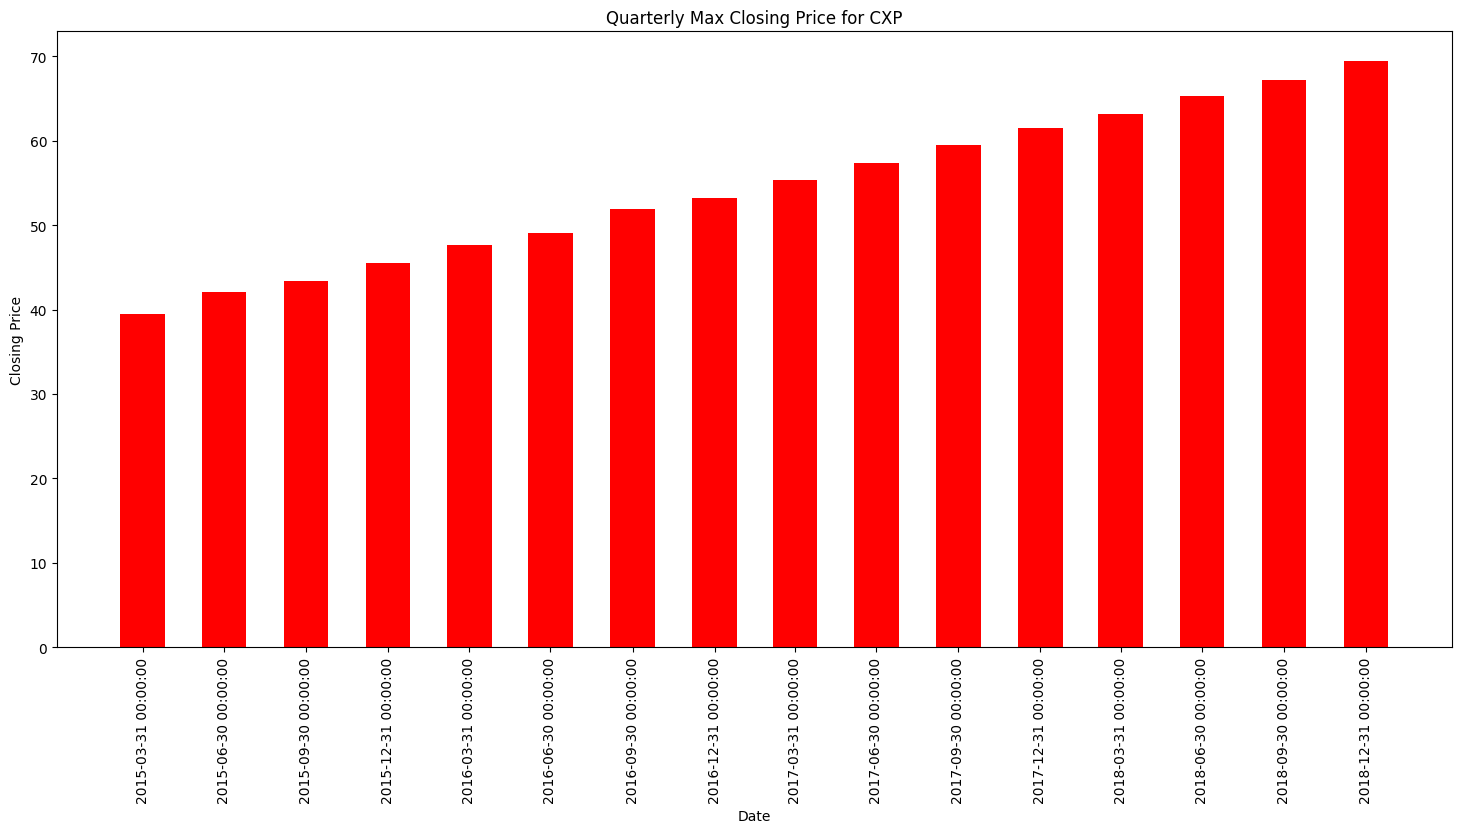

In [134]:
#Question #6 (Write the answer on your paper as'On Notebook') unless you want to draw the graph manually
# Create a bar graph (vertical), show the maximum 'Close' price

cxp_crypto_filtered = cxp_crypto[(cxp_crypto.index >= '2015-01-01') & (cxp_crypto.index <= '2018-12-31')]

max_close_price = cxp_crypto_filtered.groupby(pd.Grouper(freq='QE'))['Close'].max()

plt.figure(figsize=(18, 8))
plt.bar(max_close_price.index, max_close_price.values, color='red', width=50)

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Quarterly Max Closing Price for CXP')
plt.xticks(max_close_price.index, max_close_price.index.strftime('%Y-%m-%d %H:%M:%S'), rotation=90, ha='center')

plt.show()


In [129]:
#Question #7

# If I shift forward the (CXP) data by a value of 17, what is the new value of 'Close' price for 2015-02-26?

cxp_crypto_shifted = cxp_crypto.shift(17)
new_close_price = cxp_crypto_shifted.loc['2015-02-26', 'Close']
new_close_price


38.1813435

In [130]:
##Question #8
# If I shift backwards the (CXP) data by a value of 28, what is new value of 'Close' price for 2018-08-31?

cxp_crypto_shifted = cxp_crypto.shift(-28)
new_close_price = cxp_crypto_shifted.loc['2018-08-31', 'Close']
new_close_price

66.91537483

In [131]:
# Question No.9
# Using moving average (rolling) with 14 days window, find the closing price at 2015-04-09

cxp_crypto_rolling = cxp_crypto.rolling(window=14).mean()
closing_price = cxp_crypto_rolling.loc['2015-04-09', 'Close']
closing_price

38.83933309714286

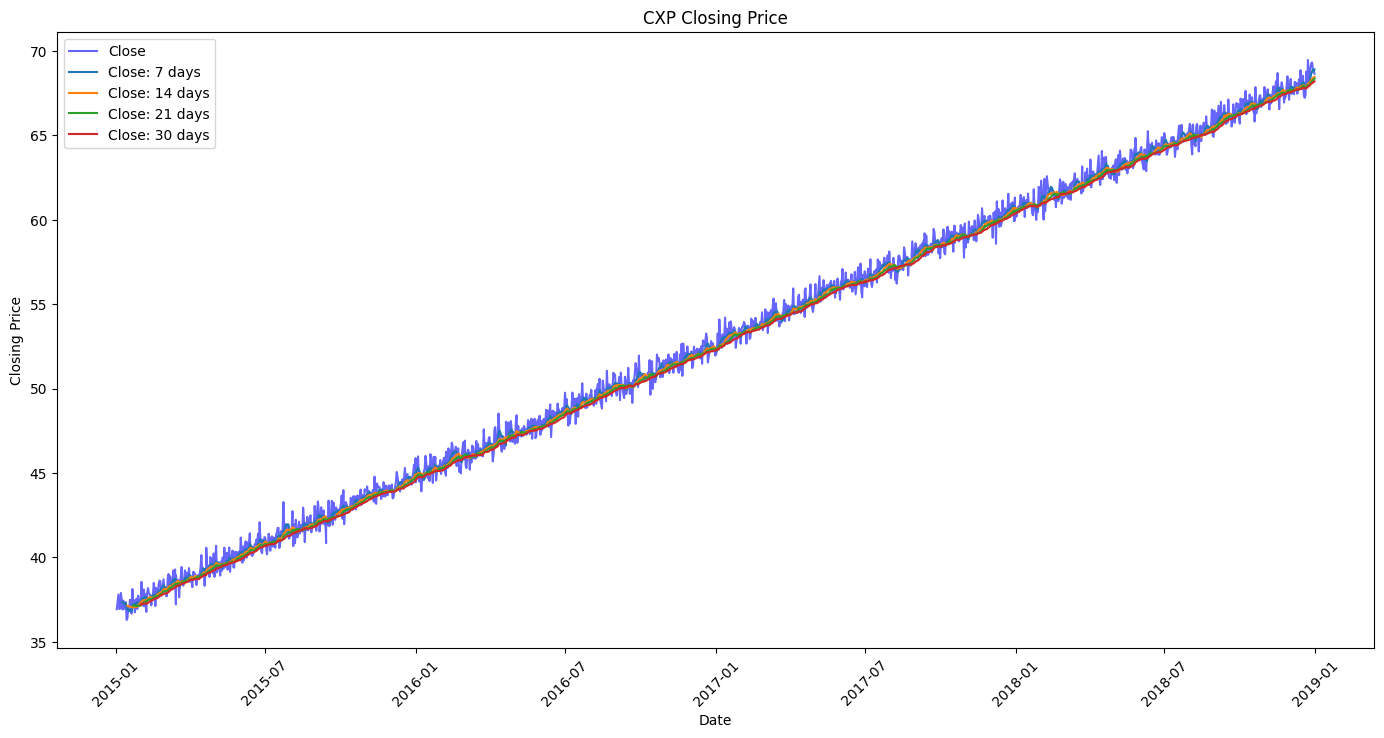

In [132]:
# Question No. 10(Write the answer on your paper as'On Notebook') unless you want to draw the graph manually
# Create the graph below with different rollilng windows 7, 14, 21, 30

windows = [7, 14, 21, 30]

plt.figure(figsize=(17, 8))

# Plot the original closing price
plt.plot(cxp_crypto['Close'], label='Close', color='blue', alpha=0.6)

# Plot moving averages for each window size
for window in windows:
    rolling_avg = cxp_crypto['Close'].rolling(window=window).mean()
    plt.plot(rolling_avg, label=f'Close: {window} days')

# Formatting the graph
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("CXP Closing Price")

plt.xticks(rotation=45)
plt.legend()
plt.show()

In [133]:
# Question No.11
# Based on the graph above, what is your take on increasing and decreasing the number of windows for rolling or moving average?

# Anser: If you decrease the window size, the moving average follows the actual price closely, making it
# useful for short-term trading insights. If you increase the window size, the moving average smooths out
# the noise and provides a better long-term trend analysis.
